# PPG Signal Analysis

### Import packages

In [1]:
import neurokit2 as nk
from scipy import signal
import scipy.stats as stats
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
# %matplotlib tk
%matplotlib inline


### Specify data path and initialize variables

In [2]:
sampling_rate = 250.0
data_path = r'sample_data/'
signal_path = os.path.join(data_path, 'P1_S1_baseline_1674758272_855629.csv')


### Load the data and plot signal

In [3]:
ppg1 = []
ppg2 =[]
arduino_ts = []
event_code = []
skip_first = True
with open(signal_path, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for ln in csvreader:
        if skip_first:
            print(ln)
            skip_first = False
        else:
            # print(ln)
            # break
            ppg1.append(float(ln[2]))
            ppg2.append(float(ln[3]))
            arduino_ts.append(float(ln[4]))
            if ln[5] != '':
                event_code.append(float(ln[5]))
            else:
                event_code.append(-1)

ppg1 = np.array(ppg1)
ppg2 = np.array(ppg2)
arduino_ts = np.array(arduino_ts)
arduino_ts = (arduino_ts - arduino_ts[0])/1000
event_code = np.array(event_code)


['EDA', 'Resp', 'PPG Finger', 'PPG Ear', 'arduino_ts', 'event_code']


### Signal Filtering and Visualization

In [4]:
sos = signal.butter(2, (0.5, 5.0), 'bandpass', fs=sampling_rate, output='sos')
filtered_ppg1 = signal.sosfilt(sos, ppg1)
filtered_ppg2 = signal.sosfilt(sos, ppg2)


Text(0, 0.5, 'PPG-Ear')

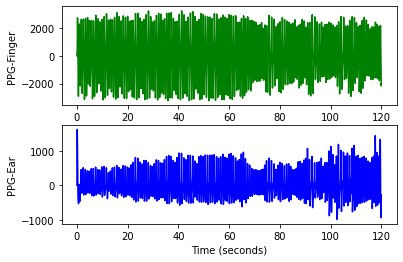

In [5]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(arduino_ts, filtered_ppg1, 'g')
# plt.plot(arduino_ts[event_code != -1], ppg1[event_code != -1], 'ro', markersize=2)
ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("PPG-Finger")

ax[1].plot(arduino_ts, filtered_ppg2, 'b')
# plt.plot(arduino_ts[event_code != -1], ppg2[event_code != -1], 'ro', markersize=2)
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("PPG-Ear")


### Process PPG Signals - NeuroKit Library

Text(0, 0.5, 'Normalized Signal Amplitude')

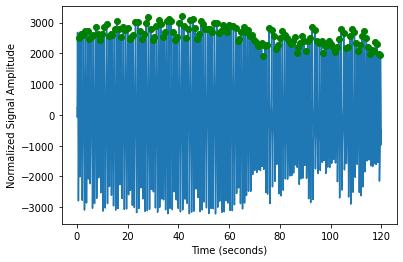

In [6]:
signals1, info1 = nk.ppg_process(filtered_ppg1, sampling_rate=sampling_rate)
plt.plot(np.arange(0, len(signals1['PPG_Clean'])/sampling_rate, 1/sampling_rate), signals1['PPG_Clean'])
plt.plot(info1['PPG_Peaks']/sampling_rate, signals1['PPG_Clean'][info1['PPG_Peaks']], 'go')
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Signal Amplitude")

Text(0, 0.5, 'Normalized Signal Amplitude')

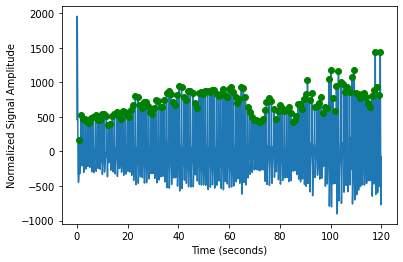

In [7]:
signals2, info2 = nk.ppg_process(filtered_ppg2, sampling_rate=sampling_rate)
plt.plot(np.arange(0, len(signals2['PPG_Clean'])/sampling_rate, 1/sampling_rate), signals2['PPG_Clean'])
plt.plot(info2['PPG_Peaks']/sampling_rate, signals2['PPG_Clean'][info2['PPG_Peaks']], 'go')
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Signal Amplitude")

In [8]:
print(vars(signals1))

{'_is_copy': None, '_mgr': BlockManager
Items: Index(['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Peaks'], dtype='object')
Axis 1: RangeIndex(start=0, stop=30000, step=1)
NumericBlock: slice(0, 4, 1), 4 x 30000, dtype: float64, '_item_cache': {'PPG_Clean': 0        -59.587579
1        -38.042922
2        -16.414356
3          5.206390
4         26.707104
            ...    
29995   -734.116272
29996   -680.193652
29997   -623.877047
29998   -566.160787
29999   -508.026924
Name: PPG_Clean, Length: 30000, dtype: float64}, '_attrs': {}, '_flags': <Flags(allows_duplicate_labels=True)>}


In [9]:
print(info1)

{'PPG_Peaks': array([  247,   432,   634,   844,  1049,  1234,  1429,  1634,  1857,
        2070,  2259,  2464,  2685,  2917,  3122,  3312,  3506,  3713,
        3946,  4165,  4361,  4570,  4785,  4999,  5185,  5363,  5553,
        5774,  6011,  6228,  6418,  6615,  6827,  7052,  7269,  7452,
        7635,  7839,  8053,  8262,  8449,  8637,  8845,  9066,  9296,
        9509,  9694,  9879, 10089, 10323, 10558, 10757, 10965, 11190,
       11429, 11648, 11835, 12028, 12237, 12453, 12667, 12890, 13117,
       13326, 13547, 13775, 13980, 14183, 14400, 14602, 14789, 14990,
       15207, 15426, 15649, 15841, 16022, 16219, 16427, 16624, 16831,
       17041, 17251, 17456, 17652, 17838, 18020, 18200, 18358, 18522,
       18700, 18937, 19190, 19439, 19638, 19827, 20025, 20245, 20466,
       20682, 20890, 21090, 21284, 21476, 21652, 21827, 22010, 22205,
       22397, 22561, 22740, 22941, 23191, 23441, 23680, 23902, 24108,
       24285, 24459, 24643, 24843, 25047, 25243, 25416, 25593, 25795,
      

Text(0, 0.5, 'Pulse Rate')

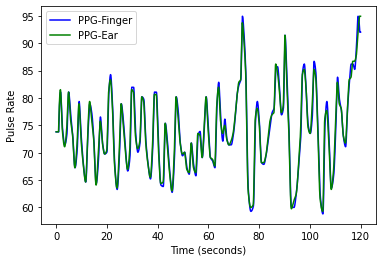

In [10]:
plt.plot(np.arange(len(signals1['PPG_Rate']))/sampling_rate, signals1['PPG_Rate'], 'b', label='PPG-Finger')
plt.plot(np.arange(len(signals2['PPG_Rate']))/sampling_rate, signals2['PPG_Rate'], 'g', label='PPG-Ear')
plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Pulse Rate")


### Correlation Analysis Between PPG-Finger and PPG-Ear

In [11]:
r, p = stats.pearsonr(signals1['PPG_Rate'], signals2['PPG_Rate'])
print(f"Computed Pearson r: {r} and p-value: {p}")


Computed Pearson r: 0.9905126165979801 and p-value: 0.0


### HRV Features

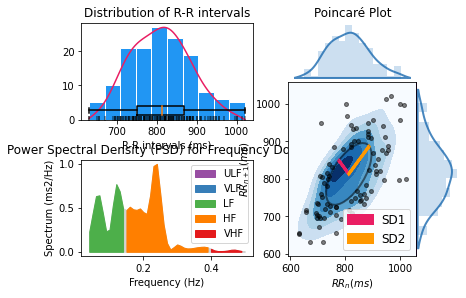

In [14]:
hrv_indices1 = nk.hrv(info1['PPG_Peaks'], sampling_rate=250, show=True)


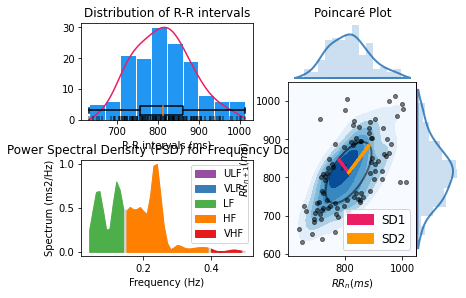

In [15]:
hrv_indices2 = nk.hrv(info2['PPG_Peaks'], sampling_rate=250, show=True)


In [50]:
for i, nm in enumerate(hrv_indices1):
    val1 = hrv_indices1.get(nm)
    val2 = hrv_indices2.get(nm)
    if (val1.values[0] == val1.values[0]) and (val2.values[0] == val2.values[0]):
        print(nm, "\t\t", val1.values[0], "\t\t", val2.values[0])


HRV_MeanNN 		 812.8493150684932 		 812.7671232876712
HRV_SDNN 		 82.42692416385462 		 80.0859056949336
HRV_RMSSD 		 71.15519706223515 		 68.99155370593287
HRV_SDSD 		 71.3992390785516 		 69.2269519856685
HRV_CVNN 		 0.10140492540971026 		 0.09853487352069967
HRV_CVSD 		 0.0875379922738071 		 0.08488477416121316
HRV_MedianNN 		 814.0 		 812.0
HRV_MadNN 		 85.9908 		 77.09519999999999
HRV_MCVNN 		 0.10563980343980343 		 0.09494482758620688
HRV_IQRNN 		 116.0 		 104.0
HRV_Prc20NN 		 740.0 		 740.0
HRV_Prc80NN 		 884.0 		 880.0
HRV_pNN50 		 47.94520547945205 		 43.83561643835616
HRV_pNN20 		 76.71232876712328 		 73.97260273972603
HRV_MinNN 		 632.0 		 632.0
HRV_MaxNN 		 1020.0 		 1012.0
HRV_HTI 		 16.22222222222222 		 18.25
HRV_TINN 		 187.5 		 195.3125
HRV_LF 		 0.05396910279703594 		 0.020548180674790067
HRV_HF 		 0.058035992336327606 		 0.04648398567158941
HRV_VHF 		 0.0010406126276216662 		 0.0012139876851589059
HRV_LFHF 		 0.929924700594014 		 0.44204859755278963
HRV_LFn 		 0.47740957